Following this tutorial: https://zindi.africa/learn/spot-the-mask-challenge-tutorial-a-deep-learning-approach

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Keras is a deep learning framework built for Python which provides methods to train deep learning models. Keras has built-in support for CNNs (for computer vision) and has a user-friendly API that makes it easy to quickly prototype deep learning models.

Importing the sequential method, means that all the layers in the model will be arranged in sequence. The importance of ImageDataGenerator is to generate batches of tensor image data with real-time data augmentation. It has very many useful functions such as rescaling, rotating, zooming etc.

The keras.layers import gives us access to layers that we need to build our CNN which are described above. Layers are the building blocks of neural networks.

Optimizers are necessary for improving your model speed and performance. Optimizers shape the model into its most accurate form by playing with model weights.

VGG16 is a convolutional neural network architecture which provides 16 layers. Its a pretrained model. VGG16 is a model employs the transfer learning architecture. Transfer learning is the art of reusing a model on one task and repurposing it on another task.

Pandas library provides built-in methods for data manipulation.

Matplotlib is used for creating graphs where necessary when building our model.

The IPython.display imports a method for viewing images within the notebook.

In [4]:
# Importing the relevant libraries
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import random
from IPython.display import Image as ShowImage
# Keras libraries
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization,GlobalMaxPooling2D
from tensorflow.keras.applications.vgg16 import VGG16
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import optimizers
from keras.models import Model

In [5]:
# Reading the data
train_labels = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Data/train_labels.csv")

# Show the first 5 rows
train_labels.head()

,image,target
0,tfymlmdkpzkqdjhdxyhnoeuqszxphw.jpg,0
1,rxgismgsvmaayzjarbfjaljhqmpbrt.jpg,1
2,uuzshfrhkgrkolhwdvliqauzulurnz.jpg,0
3,mjspxsagzusaznvnyxgamtrlqkqklp.jpg,0
4,rlbmuajgezfiddjzlyeoupxpqubkpt.jpg,1


<Axes: >

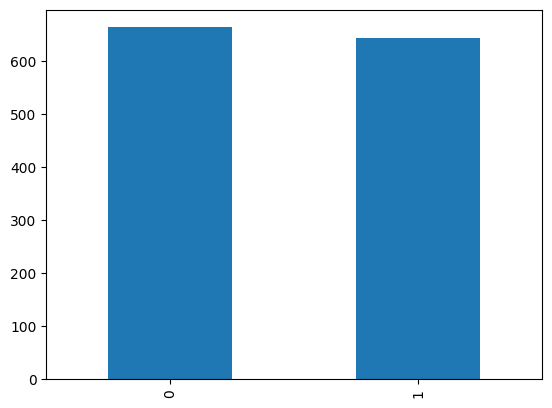

In [6]:
train_labels['target'].value_counts().plot.bar()

In [ ]:
# Extracting the zip file
!unzip -q "/content/drive/My Drive/Colab Notebooks/Data/images.zip" -d "/content/drive/My Drive//Colab Notebooks/Data/"

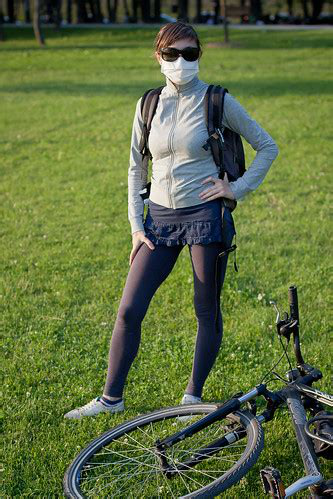

In [7]:
# We can view the images with the ShowImage functionality
ShowImage("/content/drive/My Drive/Colab Notebooks/Data/images/aadawlxbmapqrblgxyzarhjasgiobu.png")

If you found this fun, you can also use the OpenCV Library to view images!

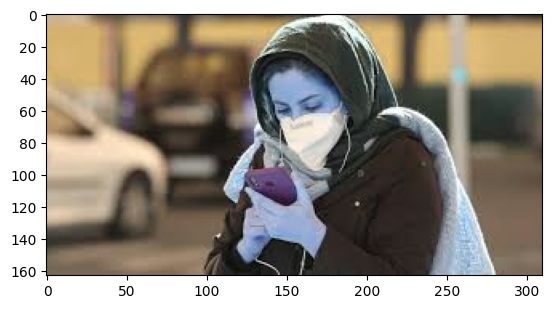

In [8]:
import cv2
import random
import os

# This stores the location of the data source
data = os.listdir("/content/drive/My Drive/Colab Notebooks/Data/images")

# Picking random sample from data list
sample = random.choice(data)

# The imread method loads image from the sprcified file
img = cv2.imread("/content/drive/My Drive/Colab Notebooks/Data/images/"+sample)

# The cmap parameter displays the image in gray
plt.imshow(img, cmap="gray")

Sample_submission.csv

This is the file that is used for making submissions after you have created your model.

We should replace the target variables (0,1) into categories (mask, unmask) using the replace method.

In [9]:
train_labels["target"] = train_labels["target"].replace({0: 'unmask', 1: 'mask'})

## Instantiating the CNN

First, we need to declare how the image data will be passed to the input layer.

In [10]:
# Defining how data is passed to the input layer
image_size = 224
input_shape = (image_size, image_size, 3)
batch_size = 16

As mentioned earlier, convnets take input tensors of the shape - image height, image width and image channels. The images’ input shape from the code above is (224,224,3).

In [11]:
pre_trained_model = VGG16(input_shape=input_shape, include_top=False, weights="imagenet")
for layer in pre_trained_model.layers[:15]:
    layer.trainable = False

for layer in pre_trained_model.layers[15:]:
    layer.trainable = True

last_layer = pre_trained_model.get_layer('block5_pool')
last_output = last_layer.output
x = GlobalMaxPooling2D()(last_output)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(2, activation='softmax')(x)

model = Model(pre_trained_model.input, x)
model.compile(loss='binary_crossentropy',
optimizer=optimizers.SGD(lr=1e-4, momentum=0.9),
metrics=['accuracy'])
model.summary()

58889256/58889256 [==============================] - 0s 0us/step


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

Here we are passing our parameters on to our VGG16.

The include_top parameter states whether to include the output layers or not. In case you are fitting your model into your own problem, you don't need it.

The weights parameter specifies what weights to load.

GlobalMaxPooling2D - this is another pooling type where the pooling size is set to equal the input size, so that the max of the entire input is connected as the output value.

Dense implements the operation using the ReLU and Softmax algorithm respectively.

The model compile method defines the model by specifying the optimiser, loss and metrics.

The loss parameter is specified to type 'binary_crossentropy'. This measures how the network will be able to measure its performance on the training data, and thus how it will be able to steer itself in the right direction.

An optimiser is the mechanism through which the network will update itself based on the data it sees and its loss function. The metrics parameter is set to 'accuracy' - here we only care about how the model will perform.

The optimiser is set to Stochastic Gradient Descent Optimiser. This refers to the mechanism through which the network will update itself based on the data it sees and its loss function.

The model summary method is used to see all parameters and shapes in each layers in our models, which will give you the following result:

```
The total parameters are 14,978,370

The trainable parameters are 7,343,106

The non-trainable parameters are 7,635,264
```

In [12]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
earlystop = EarlyStopping(patience=10)
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy',patience=2,verbose=1,factor=0.5,min_lr=0.00001)
callbacks = [earlystop, learning_rate_reduction]

Earlystop is a technique that is used to reduce overfitting without comprising on model accuracy. Too many epochs can lead to overfitting, hence the need to apply the technique.

An epoch means training the network with all the training data for one cycle. A forward pass and a backward pass are counted as one pass.

ReduceLROnPlateau is a callback to reduce the learning rate when a metric has stopped improving.

Patience is the number of epochs with no improvement after which the learning rate is reduced.

In [13]:
from sklearn.model_selection import train_test_split
train_df,validate_df=train_test_split(train_labels,test_size=0.2,random_state=42)
train_df = train_df.reset_index(drop='True')
validate_df = validate_df.reset_index(drop='True')

Here, we are importing the train_test_split method from sklearn that basically splits the training data into two separate dataframes - the training and the testing data. random_state parameter sets the seed to the random generator so that your train-test splits are always deterministic.

Next, we need to categorically encode categorical variables:

In [14]:
# Generate batches of tensor image data with real-time data augmentation
from keras.preprocessing.image import ImageDataGenerator, load_img
# Categorical encodes categorical variables
from tensorflow.keras.utils import to_categorical



Here we are rescaling the images, applying shear in some ranges, zooming the image and flipping the image horizontally:

In [15]:
# Here we are formatting the training data
train_datagen = ImageDataGenerator(rotation_range=15,
                                 rescale=1./255,
                                 shear_range=0.1,
                                 zoom_range=0.2, # zoom range (1-0.2 to 1+0.2)
                                 horizontal_flip=True,
                                 width_shift_range=0.1,
                                 height_shift_range=0.1)
train_generator = train_datagen.flow_from_dataframe(dataframe=train_df,
                                                  directory="/content/drive/My Drive/Colab Notebooks/Data/images/",
                                                  x_col="image",
                                                  y_col="target",
                                                  target_size=(image_size,image_size),
                                                  class_mode='categorical',
                                                  batch_size=15)
# Here we are formatting images on the validation data
validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_dataframe(validate_df,
                                                  directory="/content/drive/My Drive/Colab Notebooks/Data/images/",
                                                  x_col="image",
                                                  y_col="target",
                                                  target_size=(image_size,image_size),
                                                  class_mode='categorical',
                                                  batch_size=15)


Found 1046 validated image filenames belonging to 2 classes.
Found 262 validated image filenames belonging to 2 classes.


Next we need to fit the model into the training data and we are running it for 100 epochs.

In [18]:
epochs=100
total_validate = validate_df.shape[0]
total_train = train_df.shape[0]
history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=total_validate//batch_size,
    steps_per_epoch=total_train//batch_size,
    callbacks=callbacks)

# Here we are creating a list of pictures - we are appending images on the list.
# Our data source is the original data before splitting to test and train data
target=[]
for i in data:
    flag=0
    for j in train_labels["image"]:
        if(i==j):
            flag=1
            break;
        else:
            continue
    if(flag==0):
       target.append(i)


Epoch 1/100
65/65 [==============================] - 608s 9s/step - loss: 0.7374 - accuracy: 0.4923 - val_loss: 0.7111 - val_accuracy: 0.4750 - lr: 0.0100
Epoch 2/100
65/65 [==============================] - 542s 8s/step - loss: 0.6938 - accuracy: 0.5077 - val_loss: 0.6952 - val_accuracy: 0.4583 - lr: 0.0100
Epoch 3/100
65/65 [==============================] - ETA: 0s - loss: 0.6938 - accuracy: 0.4542
Epoch 3: ReduceLROnPlateau reducing learning rate to 0.004999999888241291.
65/65 [==============================] - 543s 8s/step - loss: 0.6938 - accuracy: 0.4542 - val_loss: 0.6931 - val_accuracy: 0.4750 - lr: 0.0100
Epoch 4/100
65/65 [==============================] - 541s 8s/step - loss: 0.6931 - accuracy: 0.5057 - val_loss: 0.6930 - val_accuracy: 0.5417 - lr: 0.0050
Epoch 5/100
65/65 [==============================] - 602s 9s/step - loss: 0.6933 - accuracy: 0.4809 - val_loss: 0.6930 - val_accuracy: 0.5292 - lr: 0.0050
Epoch 6/100
65/65 [==============================] - ETA: 0s - loss

Then we are creating a test data set using the image data:

In [19]:
#creating a test dataframe with images and the target is umask for all images
test = pd.DataFrame({
    'image': target,
    'target':"unmask"
})
test.head()

,image,target
0,vlxbaplwagipvtfkcjbzapysqmffld.jpg,unmask
1,rbztrgnugpkdoaxagndgdjbijoqele.jpg,unmask
2,pcoalfrhngfbattlzqaljgpzrmdiby.jpg,unmask
3,bkhjxlxizjiychukanlstfpcodlubc.jpg,unmask
4,hdmcngrvtgikfstjgrgqfotraeffgg.jpg,unmask


Lastly, we need to pass our test data to the image data generator - to fit the model into the test data:

In [21]:
test_gen = ImageDataGenerator(rescale=1./255)
test_generator = test_gen.flow_from_dataframe(
    test,
    directory="/content/drive/My Drive/Colab Notebooks/Data/images/",
    x_col="image",
    y_col="target",
    target_size=(image_size,image_size),
    class_mode='categorical',
    batch_size=15,
    shuffle=False)
nb_samples = test.shape[0]
predict = model.predict(test_generator, steps=np.ceil(nb_samples/batch_size))

Found 509 validated image filenames belonging to 1 classes.
32/32 [==============================] - 191s 6s/step


The model.predict_generator helps make predictions on new image data.

The np.ceil method is used to find the ceil of the elements of the array

In [ ]:
# Here we are converting the submission data to a dataframe
test["target"]=predict

#here we are converting to a csv file
test.to_csv("/content/drive/My Drive/Colab Notebooks/Data/masked_submission.csv",index=False)

Lastly we save our data on the submission file. When submitting the final result, always ensure that its in csv format.